In [8]:
#Análisis de si los solteros gastan mas que los casados en ifood

In [41]:
########################
# IMPORTAMOS LOS DATOS #
########################
import pandas as pd

data = pd.read_csv("../../data/data_cleaned.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
##########################
# LIMPIEZA DE CATEGORÍAS #
##########################

data_cleaned = data[(data["Marital_Status"] != "Alone") & 
                    (data["Marital_Status"] != "Absurd") & 
                    (data["Marital_Status"] != "YOLO")]

data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].replace({
    "Single": "Soltero",
    "Divorced": "Soltero",
    "Widow": "Soltero",
    "Married": "Casado",
    "Together": "Casado"
})

print("Categorías :", data_cleaned["Marital_Status"].unique())



Categorías : ['Soltero' 'Casado']


C:\Users\carlo\AppData\Local\Temp\ipykernel_13960\2098569337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].replace({


In [46]:
############################
# CREAMOS COLUMNA DE GASTO #
############################

data_cleaned["Gasto_total"] = (data_cleaned["MntWines"] + 
                          data["MntFruits"] + 
                          data["MntMeatProducts"] + 
                          data["MntFishProducts"] + 
                          data["MntSweetProducts"] + 
                          data["MntGoldProds"])

data_cleaned[["Marital_Status", "Gasto_total"]].head()


C:\Users\carlo\AppData\Local\Temp\ipykernel_13960\1840787071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Gasto_total"] = (data_cleaned["MntWines"] +


,Marital_Status,Gasto_total
0,Soltero,1617.0
1,Soltero,27.0
2,Casado,776.0
3,Casado,53.0
4,Casado,422.0


In [44]:

##########################
# GASTO POR ESTADO CIVIL #
##########################
gasto= data_cleaned.groupby("Marital_Status")["Gasto_total"].mean()

gasto_soltero = gasto["Soltero"]
gasto_casado = gasto["Casado"]

print(f"Solteros: {gasto_soltero:} €")
print(f"Casados: {gasto_casado:} €")

if gasto_soltero > gasto_casado:
    print(f"Los solteros gastan más con una media de {gasto_soltero:}")
else:
    print(f"Los casados gastan más con una media de {gasto_casado:}")

Solteros: 624.0565552699229 €
Casados: 597.6549543218553 €
Los solteros gastan más con una media de 624.0565552699229


Text(0, 0.5, 'Gasto Medio')

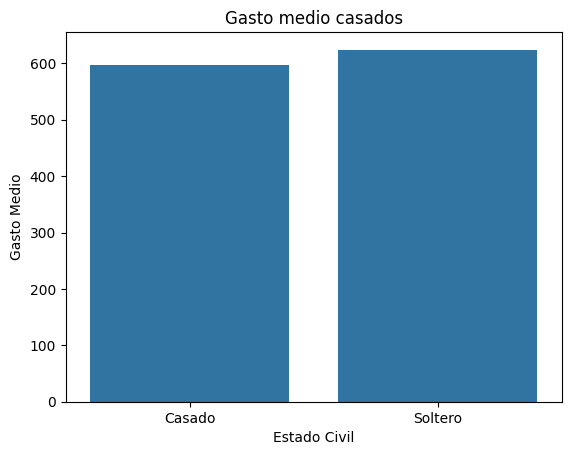

In [45]:
########################
#    VISUALIZACIÓN     #
########################

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=gasto.index, y=gasto.values)

# Añadir etiquetas
plt.title("Gasto medio casados" )
plt.xlabel("Estado Civil")
plt.ylabel("Gasto Medio")
 


